In [67]:
#Importar Biliotecas 
import pandas as pd
import matplotlib as plot
import matplotlib.pyplot as plt

plt.style.use('seaborn')


In [9]:
#Upload de arquivos via código
from google.colab import files
arq = files.upload()



Saving AdventureWorks.xlsx to AdventureWorks (1).xlsx


In [11]:
# Ler arquivo
df = pd.read_excel('AdventureWorks.xlsx')

In [12]:
# Visualizar as  cinco primeiras linhas
# OBS: "Valor Venda" é o valor da receita
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [13]:
#Tamanho da planilha
df.shape

(904, 16)

In [14]:
#Verificar tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [17]:
# Valor total das vendas
df["Valor Venda"].sum()

5984606.1426

In [22]:
# Custo total - Duas formas de fazer um com objeto e outra diretamente

custo_total = df['Custo Unitário']*df['Quantidade']
display((custo_total).sum())
(df['Custo Unitário']*df['Quantidade']).sum()

2486783.05

2486783.05

In [24]:
# Criar coluna Custo (Igual a aula)
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [25]:
# Arrendondar valor da coluna Custo para duas casas decimais
round(df['Custo'].sum(), 2)

2486783.05

In [26]:
# Criar coluna Lucro
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [27]:
# Verificar criação
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [31]:
# Total lucro com arredondamento de duas casas
round(df['Lucro'].sum(),2)

3497823.09

In [34]:
# Diferença entre data de venda e data de envio
df['Tempo Envio'] = df['Data Envio'] - df['Data Venda']

In [35]:
# Verificar a criação
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [40]:
# Transformar a coluna Tempo Envio em int
#ETAPA 1 - Retirar a palavra days dos valores da coluna
df['Tempo Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days
#ETAPA 2 - CONVERTER EM INT
df["Tempo Envio"] = df["Tempo Envio"].astype('int')
# ETAPA CONFERIR
df['Tempo Envio'].dtypes

dtype('int64')

In [43]:
# Média de Tempo de Envio por MARCA
df.groupby('Marca')['Tempo Envio'].mean()



Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

#### **Missing Values**

In [44]:
# Verificar se á valores nulos (células em branco)
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

#### **Verificando outros agrupamentos**

In [59]:
# Agrupar por ano e marca para ver o lucro
# Trata-se de um agrupamento conjungado
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()


Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [58]:
#Retirar a notação científica
pd.options.display.float_format = '{:20,.2f}'.format

In [ ]:
# Salvar os dados acima em formato coluna
# Para isso é preciso resetar o index. Isso mesmo. Ele vai indexar todas as linhas!
lucro_por_ano_e_marca = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_por_ano_e_marca

In [62]:
# Quantidade de produtos vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending= False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

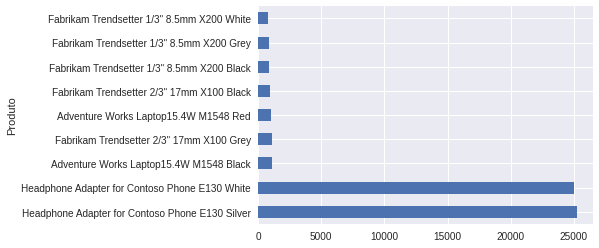

In [63]:
# Gráfico do Total de Produtos Vendidos
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending= False).plot.barh('Total Produtos Vendidos')

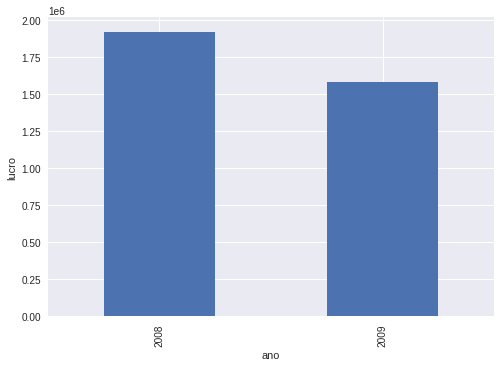

In [71]:
# Gráfico do Lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().sort_values(ascending =False).plot.bar('Lucro X Ano')
plt.xlabel('ano')
plt.ylabel('lucro');


In [72]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [79]:
#Vendas do ano 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]



,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2009-12-23,2009-12-30,199,1155,19033,200912234CS949,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",7
895,2009-01-11,2009-01-18,307,1155,19113,200901114CS680,324.69,980.00,6,882.00,"4,998.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","3,049.86",7
896,2009-03-04,2009-03-15,307,1155,19117,200903044CS706,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11
897,2009-06-12,2009-06-22,307,1226,19126,200906124CS716,330.99,999.00,6,599.40,"5,394.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,408.66",10


In [80]:
df_2009.head()


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


Text(0, 0.5, 'Lucro')

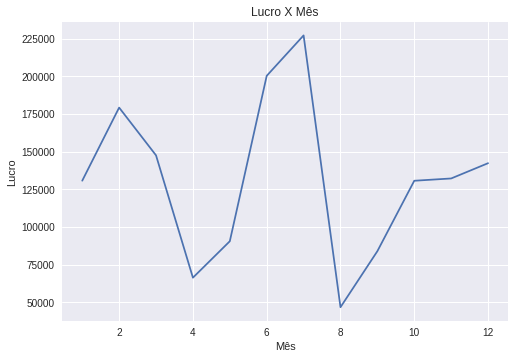

In [85]:
# Gráfico de linhas com lucros de 2009 por mês
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title = 'Lucro X Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')

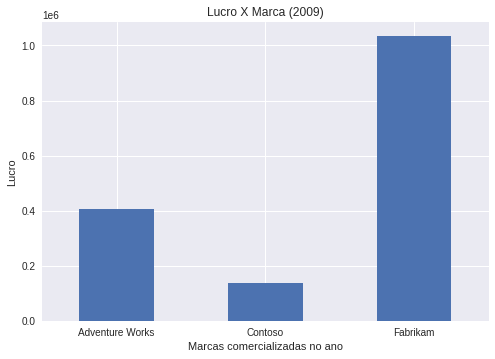

In [94]:
# Gráfico Lucro por marca
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title ='Lucro X Marca (2009)')
plt.xlabel('Marcas comercializadas no ano')
plt.ylabel('Lucro');
plt.xticks(rotation = 'horizontal');

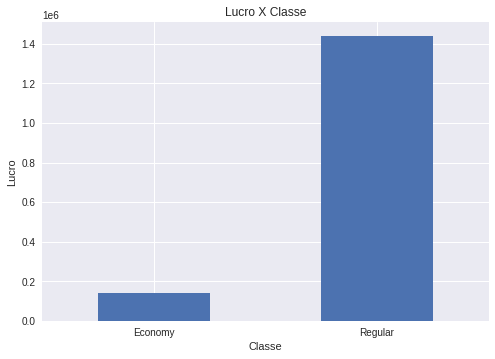

In [98]:
# Gráfico de Lucro por Classe
# Qual classe foi mais lucrativa em 2009?
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title = 'Lucro X Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation = 'horizontal');

In [100]:
df['Tempo Envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

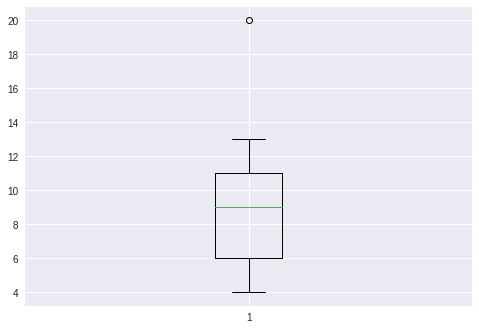

In [106]:
plt.boxplot(df['Tempo Envio']);
#Outliers é o chamado "valor discrepante", não sendo necessariamente um erro de lançamento. 
# O outlier pode ser fruto de um acontecimento atípico, passível de revisão pare ser melhor entendido. 

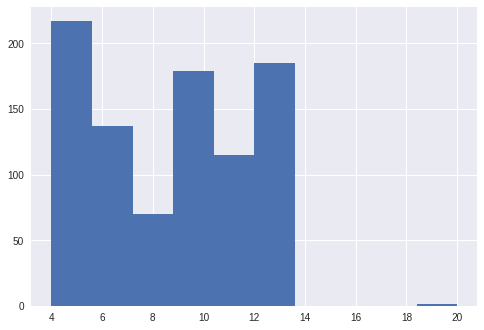

In [108]:
#Histograma do tempo de envio 
plt.hist(df['Tempo Envio']);

In [109]:
# Tempo mínimo de envio
df['Tempo Envio'].min()

4

In [110]:
# Tempo máximo de envio
df['Tempo Envio'].max()


20

In [122]:
# Localizar a venda com entrega discrepante
df[df['Tempo Envio'] == 20]


,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [113]:
# Salvar planilha editada
df.to_csv('AdventureWorks_novo.csv', index=False)